In [111]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import cm as colormaps
%matplotlib inline
from glob import glob
from tqdm import tqdm
from igraph import Graph
from igraph import ADJ_MAX
import networkx as nx
import seaborn as sns
from joblib import Parallel, delayed
sns.set()

In [2]:
def compute_APL(adj2, mode=None):
    adj = adj2.copy()
    if mode == 'normed':
        adj = adj / adj.sum()
    elif mode == 'binarized':
        adj = np.where(adj>0, 1, 0)
    elif mode == 'inversed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
    elif mode == 'inversed_normed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
        adj = adj / adj.sum()
    elif mode == 'normed_inversed':
        adj = adj / adj.sum()
    elif mode == 'log_normed':
        adj = np.log1p(adj)
        r, c = np.where(adj != 0)
        adj[r, c] = 1 / adj[r, c]
        adj = adj / adj.sum()
    
    
    g = nx.from_numpy_array(adj)
    comp = list(nx.components.connected_component_subgraphs(g))
    largest = np.argmax([len(c) for c in comp]) 
    return nx.average_shortest_path_length(comp[largest], weight='weight')

def compute_shortest_path_length(adj2, mode=None):
    adj = adj2.copy()
    if mode == 'normed':
        adj = adj / adj.sum()
    elif mode == 'binarized':
        adj = np.where(adj>0, 1, 0)
    elif mode == 'inversed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
    elif mode == 'inversed_normed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
        adj = adj / adj.sum()
    elif mode == 'normed_inversed':
        adj = adj / adj.sum()
    elif mode == 'log_normed':
        adj = np.log1p(adj)
        r, c = np.where(adj != 0)
        adj[r, c] = 1 / adj[r, c]
        adj = adj / adj.sum()
    
    
    g = nx.from_numpy_array(adj)
    comp = list(nx.components.connected_component_subgraphs(g))
    largest = np.argmax([len(c) for c in comp]) 
    spl = []
    for elem in list(nx.shortest_path_length(comp[largest], weight='weight')):
        spl.append(np.mean(list(elem[1].values())))
    return spl

def compute_clustering(adj2, mode=None):
    adj = adj2.copy()
    if mode == 'normed':
        adj = adj / adj.sum()
    elif mode == 'binarized':
        adj = np.where(adj>0, 1, 0)
    elif mode == 'inversed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
    elif mode == 'normed_inversed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
        adj = adj / adj.sum()
    elif mode == 'log_normed':
        adj = np.log1p(adj)
        r, c = np.where(adj != 0)
        adj[r, c] = 1 / adj[r, c]
        adj = adj / adj.sum()
    
    g = nx.from_numpy_array(adj)
    comp = list(nx.components.connected_component_subgraphs(g))
    largest = np.argmax([len(c) for c in comp]) 
    return np.mean(list(nx.clustering(comp[largest], weight='weight').values()))

def compute_degree(adj2, mode=None):
    adj = adj2.copy()
    if mode == 'normed':
        adj = adj / adj.sum()
    elif mode == 'binarized':
        adj = np.where(adj>0, 1, 0)
    elif mode == 'inversed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
    elif mode == 'normed_inversed':
        i, j = np.where(adj>0)
        adj[i, j] = 1/adj[i, j]
    elif mode == 'log_normed':
        adj = np.log1p(adj)
        r, c = np.where(adj != 0)
        adj[r, c] = 1 / adj[r, c]
        adj = adj / adj.sum()
    return adj.sum(axis=1)

In [3]:
# a = set([x.split('/')[-1] for x in ensemble])
# b = set([x.split('/')[-1] for x in individual])

In [4]:
# b.difference(a)
# '142626.npy'

In [5]:
APL = pd.DataFrame()
mode = 'log_normed'

ensemble_he = glob(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/*.npy")
ensemble_he = [s for s in ensemble_he if '142626.npy' not in s]
ensemble_he = sorted(ensemble_he, key=lambda x: x.split('/')[-1])
ensemble_APL_he = Parallel(18)(delayed(compute_APL)(np.load(path), mode) for path in tqdm(ensemble_he))
APL['HE3'] = ensemble_APL_he

ensemble_aver = glob(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/Aver_level3/10/*.npy")
ensemble_aver = [s for s in ensemble_aver if '142626.npy' not in s]
ensemble_aver = sorted(ensemble_aver, key=lambda x: x.split('/')[-1])
ensemble_APL_aver = Parallel(18)(delayed(compute_APL)(np.load(path), mode) for path in tqdm(ensemble_aver))
APL['Aver3'] = ensemble_APL_aver

ensemble_cspa = glob(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/CSPA_level3/10/*.npy")
ensemble_cspa = [s for s in ensemble_cspa if '142626.npy' not in s]
ensemble_cspa = sorted(ensemble_cspa, key=lambda x: x.split('/')[-1])
ensemble_APL_cspa = Parallel(18)(delayed(compute_APL)(np.load(path), mode) for path in tqdm(ensemble_cspa))
APL['CSPA3'] = ensemble_APL_cspa

ensemble_desik = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Desikan_aparc_resolution/10/*.npy')
ensemble_desik = sorted(ensemble_desik, key=lambda x: x.split('/')[-1])
ensemble_APL_desik = Parallel(18)(delayed(compute_APL)(np.load(path), mode) for path in tqdm(ensemble_desik))
APL['Desikan_aparc'] = ensemble_APL_desik


ensemble_destr = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Destrieux_aparc2009_resolution/10/*.npy')
ensemble_destr = sorted(ensemble_destr, key=lambda x: x.split('/')[-1])
ensemble_APL_destr = Parallel(18)(delayed(compute_APL)(np.load(path), mode) for path in tqdm(ensemble_destr))
APL['Destrieux_aparc2009'] = ensemble_APL_destr


individual = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
individual = [s for s in individual if '142626.npy' not in s]
individual = sorted(individual, key=lambda x: x.split('/')[-1])
level3_individual_APL = Parallel(18)(delayed(compute_APL)(np.load(path), mode) for path in tqdm(individual))
APL['individual_louvain_level3'] = level3_individual_APL

100%|██████████| 425/425 [00:07<00:00, 54.28it/s]


In [6]:
APL.columns = ["$HE_3$", "$Aver_3$", "$CSPA_3$", "$Desikan$",  "$Destrieux$", "$Individual$"]

In [7]:
corr_APL = (np.round(APL.corr(), 2) * 100).astype(int)

In [107]:
10000*APL.agg(['mean', 'std'])

,$HE_3$,$Aver_3$,$CSPA_3$,$Desikan$,$Destrieux$,$Individual$
mean,1.781029,1.691073,178.567221,3.261391,0.806339,1.280345
std,0.144130,0.112686,0.362039,0.313448,0.083545,0.179082


In [9]:
mode = 'log_normed'

CC = pd.DataFrame()

ensemble_he = glob(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/10/*.npy")
ensemble_he = [s for s in ensemble_he if '142626.npy' not in s]
ensemble_he = sorted(ensemble_he, key=lambda x: x.split('/')[-1])
ensemble_clustering_he = Parallel(18)(delayed(compute_clustering)(np.load(path), mode) for path in tqdm(ensemble_he))
CC['HE3'] = ensemble_clustering_he

ensemble_aver = glob(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/Aver_level3/10/*.npy")
ensemble_aver = [s for s in ensemble_aver if '142626.npy' not in s]
ensemble_aver = sorted(ensemble_aver, key=lambda x: x.split('/')[-1])
ensemble_clustering_aver = Parallel(18)(delayed(compute_clustering)(np.load(path), mode) for path in tqdm(ensemble_aver))
CC['Aver3'] = ensemble_clustering_aver

ensemble_cspa = glob(f"/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/CSPA_level3/10/*.npy")
ensemble_cspa = [s for s in ensemble_cspa if '142626.npy' not in s]
ensemble_cspa = sorted(ensemble_cspa, key=lambda x: x.split('/')[-1])
ensemble_clustering_cspa = Parallel(18)(delayed(compute_clustering)(np.load(path), mode) for path in tqdm(ensemble_cspa))
CC['CSPA3'] = ensemble_clustering_cspa


ensemble_desik = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Desikan_aparc_resolution/10/*.npy')
ensemble_desik = sorted(ensemble_desik, key=lambda x: x.split('/')[-1])
ensemble_clustering_desik = Parallel(18)(delayed(compute_clustering)(np.load(path), mode) for path in tqdm(ensemble_desik))
CC['Desikan_aparc'] = ensemble_clustering_desik


ensemble_destr = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Destrieux_aparc2009_resolution/10/*.npy')
ensemble_destr = sorted(ensemble_destr, key=lambda x: x.split('/')[-1])
ensemble_clustering_destr = Parallel(18)(delayed(compute_clustering)(np.load(path), mode) for path in tqdm(ensemble_destr))
CC['Destrieux_aparc2009'] = ensemble_clustering_destr


individual = glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation/level3/10/*.npy')
individual = [s for s in individual if '142626.npy' not in s]
individual = sorted(individual, key=lambda x: x.split('/')[-1])
level3_individual_clustering = Parallel(18)(delayed(compute_clustering)(np.load(path), mode) for path in tqdm(individual))
CC['individual_louvain_level3'] = level3_individual_clustering

100%|██████████| 425/425 [00:16<00:00, 25.04it/s]


In [10]:
CC.columns = ["$HE_3$", "$Aver_3$", "$CSPA_3$", "$Desikan$",  "$Destrieux$", "$Individual$"]

In [11]:
corr_CC = (np.round(CC.corr(), 2) * 100).astype(int)

In [110]:
100*CC.agg(['mean', 'std'])

,$HE_3$,$Aver_3$,$CSPA_3$,$Desikan$,$Destrieux$,$Individual$
mean,9.040098,9.487509,74.567034,8.598725,9.130635,10.137566
std,0.251785,0.289125,7.078205,0.269698,0.243840,0.339935


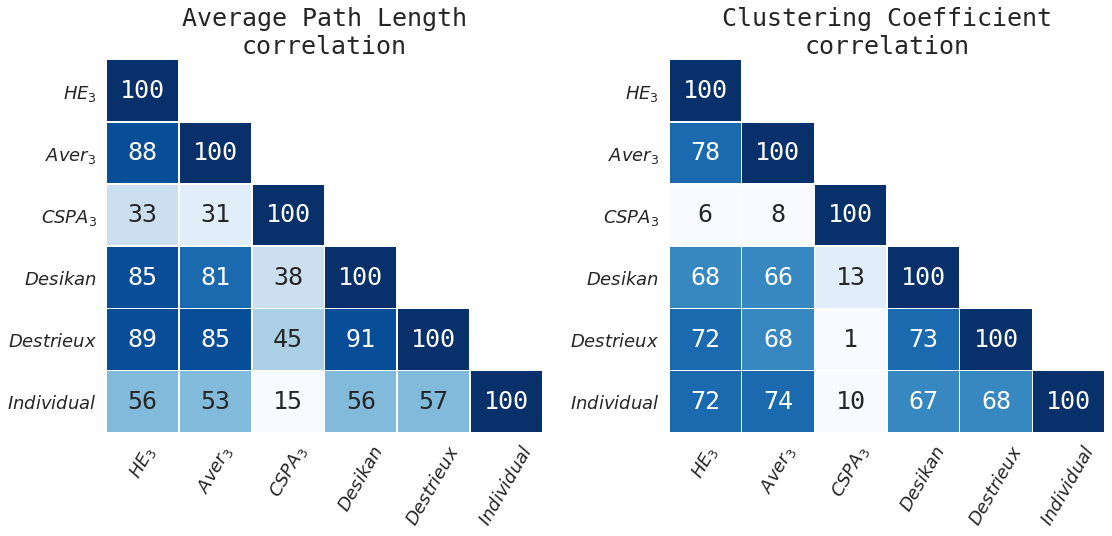

In [24]:
font = {'family' : 'monospace',
        'size'   : 25}
plt.rc('font', **font)

f, ax = plt.subplots(1, 2, figsize=(16,8))

mask = np.zeros_like(corr_APL, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
cmap = colormaps.get_cmap('Blues', 10) 
cmap.set_bad('w') 

sns.heatmap(corr_APL,
            annot=True,
            linewidths=.5,
            fmt='',
            ax=ax[0],
            mask=mask,
            cmap=cmap,
            cbar=False)

ax[0].tick_params(axis='x', rotation=60, labelsize=18)
ax[0].tick_params(axis='y', rotation=0, labelsize=18)
ax[0].set_title('Average Path Length\ncorrelation', fontdict=font)

mask = np.zeros_like(corr_CC, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
cmap = colormaps.get_cmap('Blues', 10) 
cmap.set_bad('w') 

sns.heatmap(corr_CC,
            annot=True,
            linewidths=.5,
            fmt='',
            ax=ax[1],
            mask=mask,
            cmap=cmap,
            cbar=False)

ax[1].tick_params(axis='x', rotation=60, labelsize=18)
ax[1].tick_params(axis='y', rotation=0, labelsize=18)
ax[1].set_title('Clustering Coefficient\ncorrelation', fontdict=font)


f.tight_layout()
f.savefig('/home/kurmukov/parcellation_apl_cc_correlation.png', dpi=300, transparent=True)

In [73]:
df_APL = pd.DataFrame(APL.drop('$CSPA_3$',axis=1).values.T.reshape(-1), columns=['Average Path Length'])
df_APL['Parcellation'] = ['$HE_3$']*425 + ['$Aver_3$']*425  + ['$Desikan$']*425 + ['$Destrieux$']*425 + ['$Individual$']*425

df_CC = pd.DataFrame(CC.drop('$CSPA_3$',axis=1).values.T.reshape(-1), columns=['Clustering Coefficient'])
df_CC['Parcellation'] = ['$HE_3$']*425 + ['$Aver_3$']*425  + ['$Desikan$']*425 + ['$Destrieux$']*425 + ['$Individual$']*425

# df_APL = pd.DataFrame(APL.values.T.reshape(-1), columns=['Average Path Length'])
# df_APL['Parcellation'] = ['$HE_3$']*425 + ['$Aver_3$']*425 + ['$CSPA_3$']*425 + ['$Desikan$']*425 + ['Destrieux']*425 + ['Individual']*425

In [82]:
sns.set_style("whitegrid")

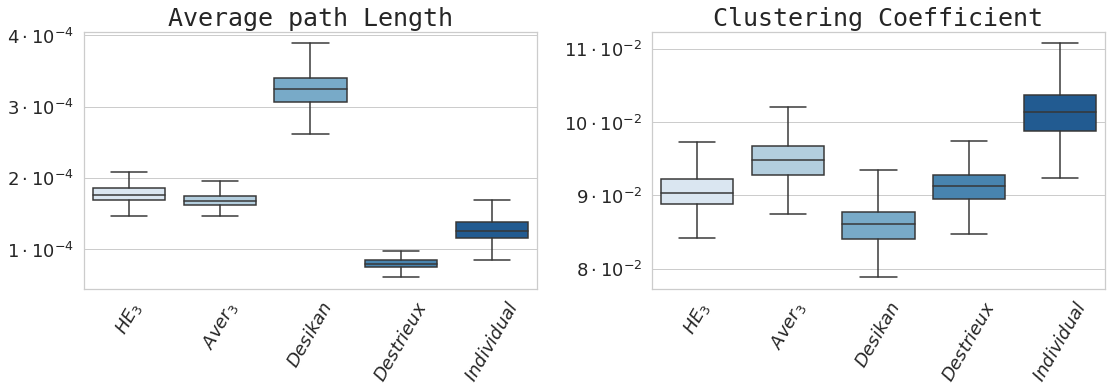

In [94]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

sns.boxplot(x = 'Parcellation',
            y='Average Path Length',
            data=df_APL,
            showfliers=False,
            ax=ax[0], palette='Blues');
sns.boxplot(x = 'Parcellation',
            y='Clustering Coefficient',
            data=df_CC, 
            showfliers=False,
            ax=ax[1], palette='Blues');

ax[0].set_yticks([.0001, .0002, .0003, .0004])
ax[0].set_yticklabels(['$1\cdot 10^{-4}$', '$2\cdot 10^{-4}$', '$3\cdot 10^{-4}$', '$4\cdot 10^{-4}$'])
ax[1].set_yticks([.08, .09, .10, .11])
ax[1].set_yticklabels(['$8\cdot 10^{-2}$', '$9\cdot 10^{-2}$', '$10\cdot 10^{-2}$', '$11\cdot 10^{-2}$'])
ax[0].tick_params(axis='x', labelsize=18, rotation=60)
ax[0].tick_params(axis='y', labelsize=18)
ax[1].tick_params(axis='x', labelsize=18, rotation=60)
ax[1].tick_params(axis='y', labelsize=18)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[0].set_title('Average path Length', fontdict=font)
ax[1].set_title('Clustering Coefficient', fontdict=font)
f.tight_layout()
f.savefig('/home/kurmukov/parcellation_apl_cc_values.png', dpi=300, transparent=False)

# Number of clusters in different parcellations

In [91]:
results = glob('/home/kurmukov/connective_parcellation/concon_processing/model_eval_results/*.csv')

df = pd.read_csv(results[0], index_col=0)
for f in results[1:]:
    if 'cv' not in f:
        temp = pd.read_csv(f, index_col=0)
        df = df.append(temp, ignore_index=True)

auc_test = df.test_mean
auc_mean = df.cv_mean
n_features = df.non_zero
def fun(x):
    return int(0.5 * (1 + np.sqrt(1 + 8*x)))
df['n_vertices'] = df.n_features.apply(fun)

In [92]:
df.groupby(['ensemble', 'level'])['n_vertices'].agg(['mean', 'std'])

mean       std
ensemble            level                 
Aver                1        8.1  0.316228
                    2       32.8  0.788811
                    3       88.7  2.790858
CSPA                1        6.9  0.316228
                    2        7.9  0.316228
                    3       10.0  1.154701
Desikan_aparc       0       68.0  0.000000
Destrieux_aparc2009 0      148.0  0.000000
HE                  1        8.4  0.516398
                    2       31.1  1.595131
                    3       85.9  2.282786

# Number of parcels in individual networks

In [95]:
f = '/data01/ayagoz/sparse_32_concon_HCP/connectomes/individual_louvain_parcellation'
level = []
sparsity = []
n_nodes = []
for l in ['level1', 'level2', 'level3']:
    for s in range(10, 101, 10):
        paths = glob(f'{f}/{l}/{s}/*.npy')
        for p in paths:
            adj = np.load(p)
            size = adj.shape[0]
            level.append(l)
            sparsity.append(s)
            n_nodes.append(size)

In [98]:
df = pd.DataFrame()

In [99]:
df['level'] = level
df['sparsity'] = sparsity
df['n_nodes'] = n_nodes

In [101]:
df.groupby('level')['n_nodes'].agg(['mean', 'std'])

,mean,std
level,,
level1,9.242510,2.215113
level2,34.788194,3.632732
level3,95.963611,6.549602
